**Fundamentals of Solar Cells and Photovoltaic Systems Engineering**

**Solutions Manual - Chapter 15**

**Problem 15.6**


**Obtain the short-circuit current density $J_{SC}$ under the AM0 spectrum for each subcell of the III-V triple junction solar cell used in Problem 6.1, using the tabulated data for the Quantum Efficiency (QE) provided in the online repository of this book. Calculate the current balance of the top and middle subcells ($J_{SC,top}$/$J_{SC,middle}$) and compare it with the results obtained in Problem 6.1.**

We will use the package [pandas](https://pandas.pydata.org/) to handle the data and [matplotlib.pyplot](https://matplotlib.org/stable/index.html) to plot the results.

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

We start by importing the data for the solar spectra.

In [34]:
datafile = pd.read_csv('data/Reference_spectrum_ASTM-G173-03.csv', index_col=0, header=0) 
datafile

,AM0,AM1.5G,AM1.5D
Wvlgth nm,Etr W*m-2*nm-1,Global tilt W*m-2*nm-1,Direct+circumsolar W*m-2*nm-1
280,8.20E-02,4.73E-23,2.54E-26
280.5,9.90E-02,1.23E-21,1.09E-24
281,1.50E-01,5.69E-21,6.13E-24
281.5,2.12E-01,1.57E-19,2.75E-22
...,...,...,...
3980,8.84E-03,7.39E-03,7.40E-03
3985,8.80E-03,7.43E-03,7.45E-03
3990,8.78E-03,7.37E-03,7.39E-03
3995,8.70E-03,7.21E-03,7.23E-03


In [35]:
datafile.drop(datafile.index[0], inplace=True)   #remove row including information on units
datafile=datafile.astype(float)                  #convert values to float for easy operation
datafile.index=datafile.index.astype(float)      #convert indexes to float for easy operation

We can also plot the three spectra

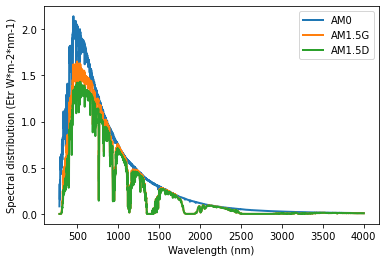

In [36]:
plt.plot(datafile, 
         linewidth=2, label=datafile.columns)
plt.ylabel('Spectral distribution (Etr W*m-2*nm-1)')
plt.xlabel('Wavelength (nm)')
plt.legend()

We define the relevant constants and import the QE of the triple junction solar cell.

In [37]:
h=6.63*10**(-34)   # [J·s] Planck constant
e=1.60*10**(-19)   # [C] electron charge
c =299792458       #[m/s] Light speed

In [38]:
QE_data = pd.read_csv('data/QE_triple_junction_solar_cell.csv', index_col=0, header=0) 
QE_top=QE_data['QE top'].dropna()
QE_data.set_index('nm middle', inplace=True)
QE_mid=QE_data['QE middle'].dropna()
QE_data.set_index('nm bottom', inplace=True)
QE_bot=QE_data['QE bottom'].dropna()

In [39]:
QE_top?

We can plot the Quantum Efficiency.

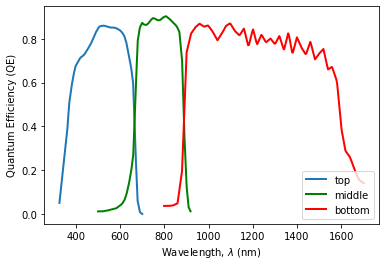

In [32]:
plt.plot(QE_top, linewidth=2, label='top', )
plt.plot(QE_mid, linewidth=2, label='middle',color='green')
plt.plot(QE_bot, linewidth=2, label='bottom', color='red')
plt.ylabel('Quantum Efficiency (QE)')
plt.xlabel('Wavelength, $\lambda$ (nm)');
plt.legend(loc='lower right')

For the top subcell, we calculate the spectral response, interpolate the spectrum, and integrate to obtain the short-circuit current density using Eq. 3.5.

$J=\int SR(\lambda) \cdot G(\lambda) \ d\lambda$

In this case, we assume the extraterrestrial irradiance AM0.

In [16]:
QE=QE_top
SR=pd.Series(index=QE.index,
            data=[QE.loc[i]*e*i*0.000000001/(h*c) for i in QE.index])

spectrum='AM0'
spectra=datafile[spectrum]
spectra_interpolated=np.interp(SR.index, spectra.index, spectra.values)

J_top = np.trapz([x*y for x,y in zip(SR, spectra_interpolated)], x=SR.index)*1000/10000 # A-> mA ; m2 -> cm2
print('Photocurrent density top = ' + str(J_top.round(1)) + ' mA/cm2')

Photocurrent density top= 17.4 mA/cm2


We repeat the analysis for the middle subcell.

In [17]:
QE=QE_mid
SR=pd.Series(index=QE.index,
            data=[QE.loc[i]*e*i*0.000000001/(h*c) for i in QE.index])

spectra=datafile[spectrum]
spectra_interpolated=np.interp(SR.index, spectra.index, spectra.values)

J_mid = np.trapz([x*y for x,y in zip(SR, spectra_interpolated)], x=SR.index)*1000/10000 # A-> mA ; m2 -> cm2
print('Photocurrent density middle = ' + str(J_mid.round(1)) + ' mA/cm2')

Photocurrent density middle= 15.2 mA/cm2


We repeat the analysis for the bottom subcell.

In [18]:
QE=QE_bot
SR=pd.Series(index=QE.index,
            data=[QE.loc[i]*e*i*0.000000001/(h*c) for i in QE.index])

spectra=datafile[spectrum]
spectra_interpolated=np.interp(SR.index, spectra.index, spectra.values)

J_bot = np.trapz([x*y for x,y in zip(SR, spectra_interpolated)], x=SR.index)*1000/10000 # A-> mA ; m2 -> cm2
print('Photocurrent density bottom = ' + str(J_bot.round(1)) + ' mA/cm2')

Photocurrent density bottom= 27.6 mA/cm2


The middle subcell determines the current flowing throughout the device since it is the subcell that generates the lowest current. The current balance of the top and middle subcells ($J_{SC,top}$/$J_{SC,middle}$) can be calculated as follows:

In [19]:
J_top/J_mid

1.1427435817154772

In this case, the top subcell is producing 14 % more current than the middle subcell. This can be compared with the performance under AM1.5G spectrum when the top subcell only produces 1% extra relative to the middle subcell. 

**What changes could be incorporated in the structure of the solar cell to enhance the current balance of the top and middle subcells under the AM0 spectrum?**

In order to improve the current balance, the thickness of the top subcell should be reduced. Alternatively, a higher bandgap material could be used in the top subcell which would reduce its current and increase that of the middle subcell, improving the balance under AM0.  